In [100]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = "prof.jpg"
img = Image.open(img_path)
img_array = np.array(img)

height, width, _ = img_array.shape
print(f"Image dimensions (Height, Width): ({height}, {width})")

Image dimensions (Height, Width): (904, 1280)


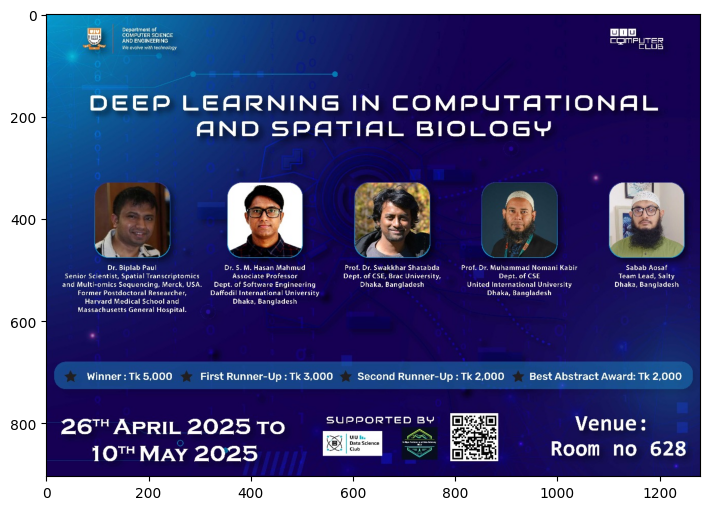

In [101]:
plt.figure(figsize=(10,6))
plt.imshow(img_array)
plt.show()

In [102]:
heatmap_data = np.zeros((height, width))
heatmap_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(904, 1280))

In [103]:
heatmap_data[330:480, 90:250] = 300 #biplab
# heatmap_data[300:500, 100:300] = 200 #hasan
# heatmap_data[300:500, 100:300] = 600 #swakhar
# heatmap_data[300:500, 100:300] = 400 #nomani
# heatmap_data[300:500, 100:300] = 100 #shabab

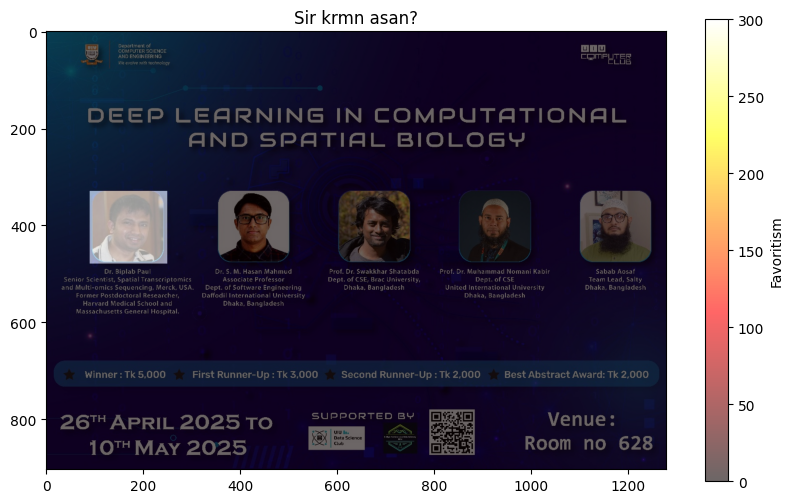

In [104]:
plt.figure(figsize=(10,6))

plt.imshow(img_array)

plt.imshow(heatmap_data, cmap='hot', alpha=0.6)

plt.colorbar(label = "Favoritism")
plt.title("Sir krmn asan?")
# plt.axis('off')
plt.show()

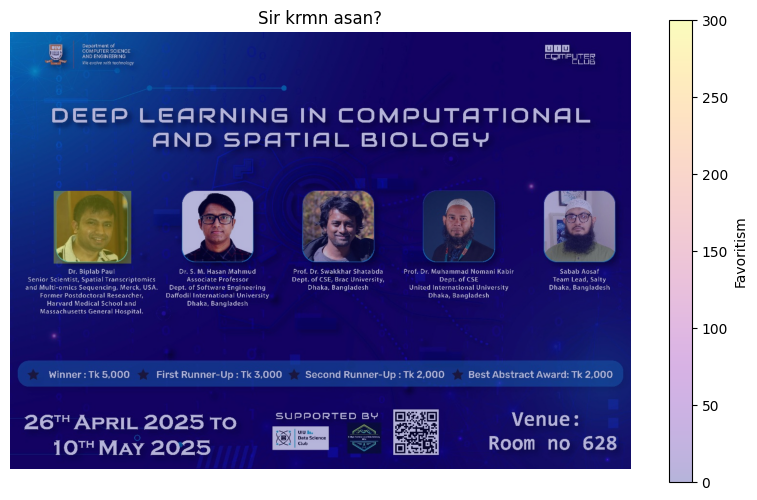

In [105]:
plt.figure(figsize=(10,6))

plt.imshow(img_array)

plt.imshow(heatmap_data, cmap='plasma', alpha=0.3)

plt.colorbar(label = "Favoritism")
plt.title("Sir krmn asan?")
plt.axis('off')
plt.show()

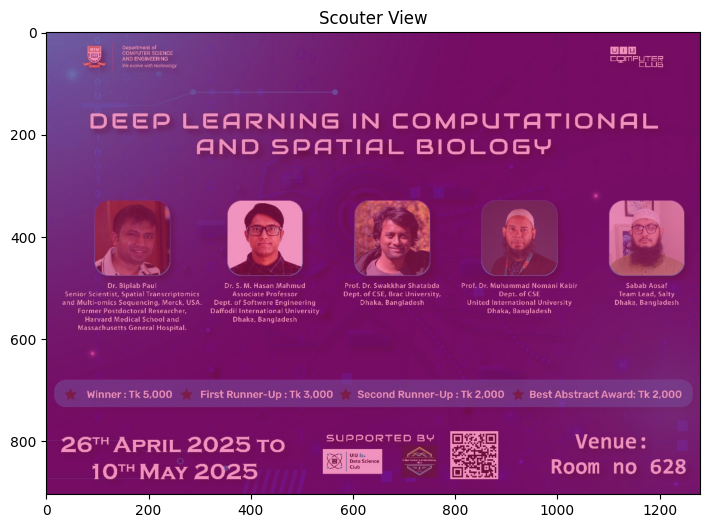

In [106]:
overlay_color = np.array([225, 25, 120, 120], dtype=np.uint8)

if img.mode != 'RGBA':
    img = img.convert("RGBA")

overlay = Image.new("RGBA", img.size, tuple(overlay_color))
scouter_img = Image.alpha_composite(img, overlay)

scouter_arr = np.array(scouter_img)

plt.figure(figsize=(10,6))
plt.imshow(scouter_arr)
plt.title("Scouter View")
plt.show()

In [107]:
# power_map = np.zeros((height, width))

# for (x1, y1, x2, y2), power in zip(positions, power_levels):
#     power_map[y1:y2, x1:x2] = power

masked_map = np.ma.masked_where(heatmap_data == 0, heatmap_data)
masked_map

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

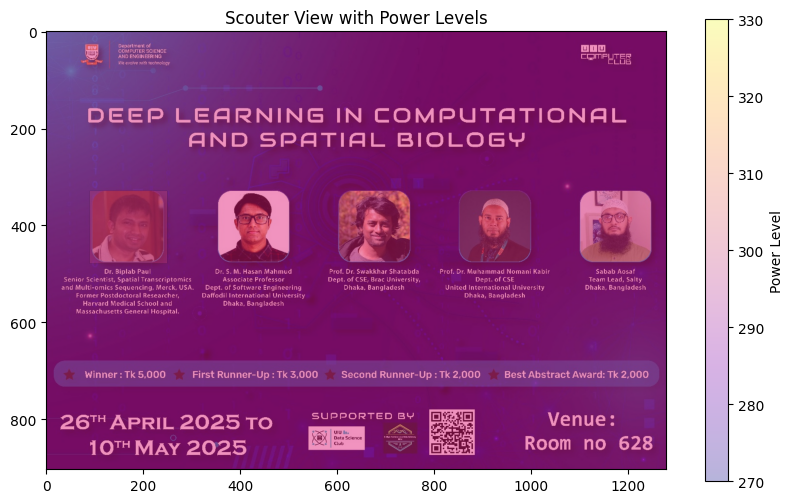

In [108]:
plt.figure(figsize=(10,6))
plt.imshow(scouter_arr)
plt.imshow(masked_map, cmap="plasma", alpha=0.3)
plt.colorbar(label="Power Level")
plt.title("Scouter View with Power Levels")
plt.show()